<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/COURSERA/IBM/REGRESSION/tratamento_de_dados_regressao_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

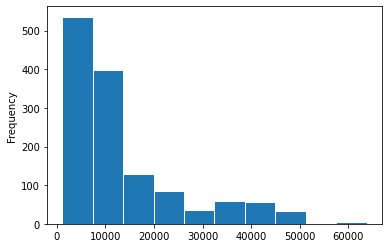

In [ ]:
dados['charges'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
dados['charges'] = dados['charges']/1000 

In [ ]:
dados

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16.884924
1,18,male,33.770,1,no,southeast,1.725552
2,28,male,33.000,3,no,southeast,4.449462
3,33,male,22.705,0,no,northwest,21.984471
4,32,male,28.880,0,no,northwest,3.866855
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10.600548
1334,18,female,31.920,0,no,northeast,2.205981
1335,18,female,36.850,0,no,southeast,1.629833
1336,21,female,25.800,0,no,southwest,2.007945


In [ ]:
dados['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
def filhos(x):
    if x == 0:
      return '0 -'
    elif x <= 1:
      return '1'
    elif x <= 2:
      return '2'
    else:
      return '3+'

dados['children'] = dados['children'].apply(filhos)

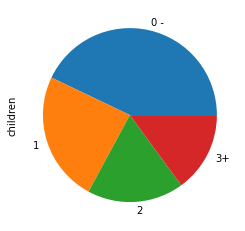

In [ ]:
dados['children'].value_counts().plot(kind = 'pie');

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0 -,yes,southwest,16.884924
1,18,male,33.770,1,no,southeast,1.725552
2,28,male,33.000,3+,no,southeast,4.449462
3,33,male,22.705,0 -,no,northwest,21.984471
4,32,male,28.880,0 -,no,northwest,3.866855


In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})

In [ ]:
# fazendo em mais de uma variavel e salvando 

variaveis_cat = ['region', 'sex', 'children', 'smoker']

dados = pd.get_dummies(dados, columns = variaveis_cat, drop_first = True)

In [ ]:
dados.head()

,age,bmi,charges,region_northwest,region_southeast,region_southwest,sex_male,children_1,children_2,children_3+,smoker_1
0,19,27.900,16.884924,0,0,1,0,0,0,0,1
1,18,33.770,1.725552,0,1,0,1,1,0,0,0
2,28,33.000,4.449462,0,1,0,1,0,0,1,0
3,33,22.705,21.984471,1,0,0,1,0,0,0,0
4,32,28.880,3.866855,1,0,0,1,0,0,0,0


In [ ]:
dados['bmi'] = dados['bmi']/100

In [ ]:
# padronização

import numpy as np
media = np.mean(dados['age'])
desvio = np.std(dados['age'])

dados['age'] = (dados['age'] - media)/desvio

In [ ]:
dados

,age,bmi,charges,region_northwest,region_southeast,region_southwest,sex_male,children_1,children_2,children_3+,smoker_1
0,-1.438764,0.27900,16.884924,0,0,1,0,0,0,0,1
1,-1.509965,0.33770,1.725552,0,1,0,1,1,0,0,0
2,-0.797954,0.33000,4.449462,0,1,0,1,0,0,1,0
3,-0.441948,0.22705,21.984471,1,0,0,1,0,0,0,0
4,-0.513149,0.28880,3.866855,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.30970,10.600548,1,0,0,1,0,0,1,0
1334,-1.509965,0.31920,2.205981,0,0,0,0,0,0,0,0
1335,-1.509965,0.36850,1.629833,0,1,0,0,0,0,0,0
1336,-1.296362,0.25800,2.007945,0,0,1,0,0,0,0,0


In [ ]:
dados.to_csv('insurance_processado_regressao.csv')